In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

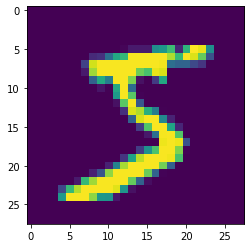

In [7]:
plt.imshow(x_train[0])

In [8]:
y_train[0]

5

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_cat_train = to_categorical(y_train)

In [11]:
y_cat_test = to_categorical(y_test)

In [18]:
x_train.max()

255

In [19]:
x_train=x_train/255
x_test = x_test/255

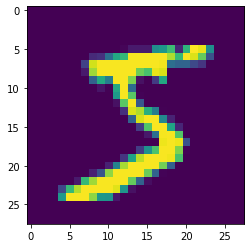

In [20]:
plt.imshow(x_train[0])
#This shows that the ratio is still same

In [21]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [22]:
x_train.shape

(60000, 28, 28, 1)

### Time to Train the Model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D

In [24]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop=EarlyStopping(patience=1)

In [27]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 329us/sample - loss: 0.1358 - accuracy: 0.9600 - val_loss: 0.0522 - val_accuracy: 0.9818
Epoch 2/10
60000/60000 [==============================] - 17s 284us/sample - loss: 0.0481 - accuracy: 0.9852 - val_loss: 0.0417 - val_accuracy: 0.9868
Epoch 3/10
60000/60000 [==============================] - 17s 287us/sample - loss: 0.0313 - accuracy: 0.9900 - val_loss: 0.0394 - val_accuracy: 0.9875
Epoch 4/10
60000/60000 [==============================] - 17s 289us/sample - loss: 0.0207 - accuracy: 0.9934 - val_loss: 0.0428 - val_accuracy: 0.9863


### Time to evalute the performance of the model

In [28]:
metrics = pd.DataFrame(model.history.history)

In [29]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.135848,0.960033,0.052193,0.9818
1,0.048098,0.985167,0.041692,0.9868
2,0.031343,0.990017,0.039426,0.9875
3,0.020710,0.993417,0.042787,0.9863


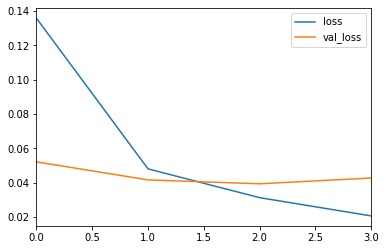

In [30]:
metrics[['loss','val_loss']].plot()

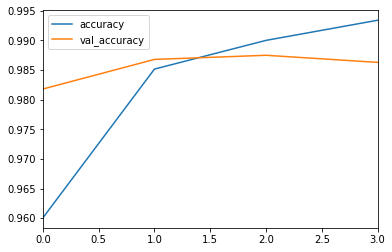

In [31]:
metrics[['accuracy','val_accuracy']].plot()

In [32]:
model.metrics_names

['loss', 'accuracy']

In [33]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.04278747055498825, 0.9863]

In [34]:
predictions = model.predict_classes(x_test)

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.98      0.99      0.98       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



array([0], dtype=int64)

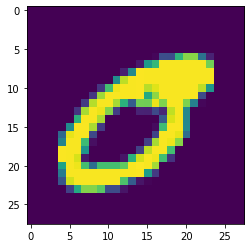

In [43]:
num = np.random.randint(0,len(x_test))
new_num = x_test[num].reshape(28,28)
plt.imshow(new_num)
model.predict_classes(new_num.reshape(1,28,28,1))